# Data Science Basics - Day 4

#### If you are using Google Colab, you must run the next line of code. *If you are NOT using Google Colab, do NOT run the next line.*

In [ ]:
!wget https://raw.githubusercontent.com/aGitHasNoName/dataScienceBasics/main/pigeonRacing.txt

<br><br>First, we will import pandas and load the pigeon racing dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("pigeonRacing.txt", delimiter="\t")

<br>Let's take a look at our dataset:

In [5]:
df.head()

,Position,Avg Unirate,Name,Racing Pigeon,Color,Sex,Qualifying Race Miles,Average Birdage
0,1,0.26%,Dean Schultz,751 AU 18 PURP,BB,F,"469, 469",612.0
1,2,1.08%,Dick Fassio,9027 AU 19 SLI,BBAR,F,"579, 500",139.0
2,3,1.42%,Gary Mosher,32826 AU 17 AA,BKC,F,"494, 539",103.0
3,4,2.21%,Todd Bartholomew,35624 AU 17 JEDD,BC,F,"547, 468",226.0
4,5,2.61%,Dustin Maxfield,3322 AU 17 OGN,BB,M,"462, 462",171.0


## <br><br>Working with Missing Data

<br>Let's look at a larger sample of our dataset:

In [6]:
df.sample(10)

,Position,Avg Unirate,Name,Racing Pigeon,Color,Sex,Qualifying Race Miles,Average Birdage
1,2,1.08%,Dick Fassio,9027 AU 19 SLI,BBAR,F,"579, 500",139.0
30,31,9.65%,Joe Bevington,25221 AU 18 ARPU,BC,F,"488, 572",353.0
25,26,8.64%,Steve Cox,91 AU 18 PCO,BLCH,F,"536, 539",72.0
22,23,8.01%,Gary Mosher,32882 AU 17 AA,BLS,M,"539, 494",103.0
23,24,8.07%,Alven Gines,9833 AU 19 SLI,BBAR,F,"584, 505",123.0
0,1,0.26%,Dean Schultz,751 AU 18 PURP,BB,F,"469, 469",612.0
33,34,9.86%,Dave Tracey,34 AU 18 PCO,BB,M,"537, 535",72.0
11,12,3.73%,Matt Badzinski,29245 AU 16 AA,BB,F,"539, 478",209.0
20,21,6.81%,Dustin Maxfield,7800 AU 19 OGN,NaN,F,"541, 462",NaN
19,20,6.78%,Keith Delpozzo,913 AU 16 SRI,NaN,M,"466, 567",31.0


<br>Missing values are represented as a special pandas object: **`NaN`**. It stands for Not a Number. The NaN value will let you complete numerical calculations on your data - it will ignore the value, so it will not include the value in calculations.

In [8]:
df["Average Birdage"].mean()

149.79310344827587

### <br><br>Finding missing data

We can look for missing data in our DataFrame using `isnull()`.

In [ ]:
df.isnull()

<br><br>This would be hard to sort through in a big DataFrame, so we can add the `nunique()` aggregation function to see which columns have missing data:

In [ ]:
df.isnull().nunique()

<br>Or we could check a particular column of interest:

In [3]:
df["Color"].isnull().nunique()

2

<br>Another way to look for missing data is to get a count of each column:

In [4]:
df.count()

Position                 34
Avg Unirate              34
Name                     34
Racing Pigeon            34
Color                    27
Sex                      34
Qualifying Race Miles    34
Average Birdage          29
dtype: int64

<br><br>We have two columns with missing data - one is numerical data (Average Birdage) and one is categorial (Color).
<br><br>We're going to walk through a few common ways to deal with missing data. 
<br><br>First, let's check the number of rows and columns in our original DataFrame to compare later:

In [ ]:
df.shape

### <br><br>Drop all rows with NaN

Let's drop every row with any NaN value using the `dropna()` function.

In [ ]:
df_no_nan_rows = df.dropna()
df_no_nan_rows.shape

### <br><br>Drop all columns with NaN

Same function, but we add the keyword argument for columns:

In [ ]:
df_no_nan_columns = df.dropna(axis=1)
df_no_nan_columns.shape

### <br><br>Drop rows with NaN in a particular column

At first, you might try to use the regular `drop()` function with a boolean, but this won't work:

In [ ]:
df_drop_rows_nan_color = df.drop(df["Color"].isnull())
df_drop_rows_nan_color.shape

<br>Instead, we can use this syntax, which filters the entire dataset on a different boolean. We are using the pandas function `notnull()` to return any non-NaN values. We pass the function the piece of the DataFrame that we want it to search through:

In [ ]:
df_drop_rows_nan_color = df[pd.notnull(df["Color"])]
df_drop_rows_nan_color.shape

### <br><br>Replace all NaNs with zero

Pandas has a `fillna()` function that will work over the entire DataFrame:

In [ ]:
df_fill_zeros = df.fillna(0)
df_fill_zeros.shape

In [ ]:
df_fill_zeros.sample(10)

<br>This replaced NaNs in both the Colors and Average Birdage columns with 0. That might not be what you want to do.

### <br><br>Replace NaNs in only one column with the mean value of that column.

This one is tricky. I don't expect you to remember how to do this. As with many things in Pandas, it isn't always intuitive how to solve every unique situation. Pandas users rely on looking things up online, and that is what I did to solve this one. 

<br>First, we need to make a copy of the original DataFrame because we are going to reference the new version on the left side of our assignment operator. Then I am going to reassign the Average Birdage column to the same column, but with the `fillna()` function applied. I am going to fill the NaNs with the mean value of that column.

In [ ]:
df_mean_birdage = df.copy()
df_mean_birdage["Average Birdage"] = df_mean_birdage["Average Birdage"].fillna(df["Average Birdage"].mean())
df_mean_birdage.sample(10)

### <br><br>Exercise

Write code to replace any missing data in the Colors column with the string "BB". I've started for you by making a copy of the DataFrame.

In [ ]:
df_replace_colors = df.copy()

In [ ]:
df_replace_colors.sample(10)

## <br><br>Basic plotting in pandas

Other python packages can help you make beautiful visualizations of your data. With Pandas, you can make several simple plots, including histograms, box and whisker plots, bar graphs, scatter plots, and pie charts. 

<br>Let's work with the version of our DataFrame where we removed all the rows with missing data, but we'll rename it `df` for convenience:

In [ ]:
df = df_no_nan_rows
df.head()

<br><br>We will first make a simple scatter plot of the columns `Position` and `Average Birdage`. We use the `plot()` function. At the least, we need to include three arguments: the kind of plot to make, the data to use for the x axis, and the data to use for the y axis.

In [ ]:
age_scatter = df.plot(kind="scatter", x="Position", y="Average Birdage")



<br><br>Let's make a bar graph of the mean Position for each sex of bird. First we group by the Sex column, then subsample only the Position column, then calculate the means, and finally plot the means. I also added an argument for "title" to this plot.

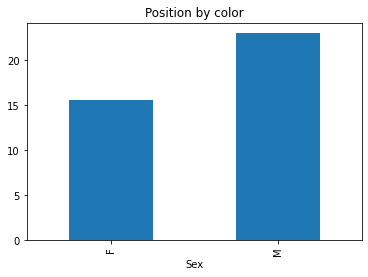

In [9]:
male_female_bar = df.groupby("Sex")["Position"].mean().plot(kind = 'bar', title = "Position by color")



### Exercise

Write code to make a bar chart to see if Position is related to Color:

<br><br><br>To make plots that are any more complicated than this (and much better looking), you're going to want to use **MatPlotLib** - the main plotting package for Python. MatPlotLib is built on pandas and works well with pandas DataFrames and Series objects, as well as other objects like lists and dicitonaries. There is a four-day workshop on MatPlotLib coming up the first week of August as part of the Next Steps in Python series.

## <br><br>Other ways to get summary stats about your data

There are several Python packages that will give you more summary stats about your data. I will demo one - **pandas-profiling** - in Google Colab. The installation was a little too tricky to set up for everyone to run themselves today. Another package is SweetViz.

## <br><br>Two tips for Data Science in Jupyter Notebooks

1. Use separate notebooks for Data Collection, Cleaning, Analysis, and Visualization.
- Save the changed DataFrame as a new csv file after each notebook.
- If you don't do this, your notebook will start to get really slow.
2. When cleaning your data - write down every choice you make.
- You can use a text doc, or a markdown cell at the bottom of your notebook, or whatever works for you.
- If you replace missing data with 0, write that down. If you remove rows for any reason, write it down.
- After you start your analysis, you might want to change things about how you cleaned the data. If you write down what you already did, you won't repeat yourself.
- When you go to publish a paper and are writing your methods section for the analysis you ran, will you remember how many rows you removed for missing data?